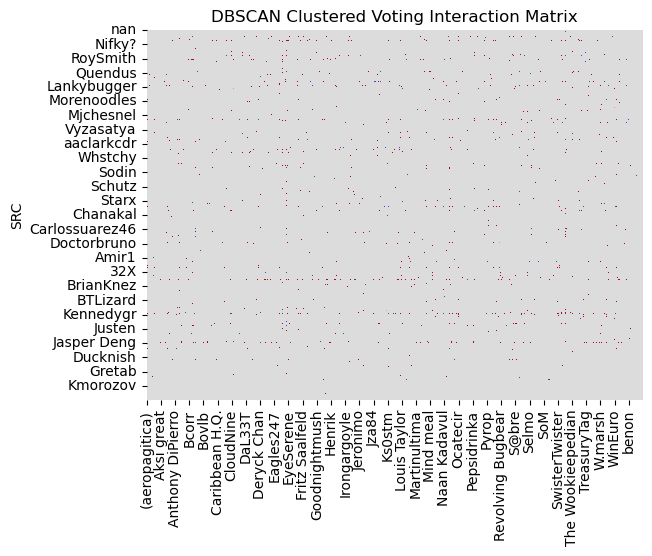

nuber of cluster: 21
Cluster labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [135]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = interaction_matrix.values

dbscan = DBSCAN(eps=0.5, min_samples=10)  
clusters = dbscan.fit_predict(data)

interaction_matrix['Cluster'] = clusters

sorted_matrix = interaction_matrix.sort_values("Cluster")

sns.heatmap(sorted_matrix.iloc[:, :-1], cmap="coolwarm", cbar=False)
plt.title("DBSCAN Clustered Voting Interaction Matrix")
plt.show()

print('nuber of cluster:',len(np.unique(clusters)))
print("Cluster labels:", np.unique(clusters))

In [154]:
feature_matrix=pd.read_csv('../../data/all_features_dataframe.csv')
feature_matrix = feature_matrix.drop_duplicates(subset='username', keep='first')

feature_matrix['community'] = feature_matrix['username'].map(updated_partition)
df_melted = feature_matrix.melt(
    id_vars=['username', 'community'],
    value_vars=['categ1', 'categ2', 'categ3', 'categ4'],
    var_name='category_level',
    value_name='category'
).dropna(subset=['category'])  

category_counts = df_melted.groupby(['community', 'category']).size().reset_index(name='count')

community_sizes = feature_matrix.groupby('community').size().reset_index(name='total_users')

category_counts = category_counts.merge(community_sizes, on='community')

category_counts['percentage'] = (category_counts['count'] / category_counts['total_users']) * 100

category_counts = category_counts.sort_values(by=['community', 'percentage'], ascending=[True, False])
top_categories = category_counts.groupby('community').head(5)

display(top_categories[4:100])



,community,category,count,total_users,percentage
9,0.0,Military,3,12,25.000000
99,1.0,History,164,627,26.156300
75,1.0,Entertainment,153,627,24.401914
65,1.0,Culture,134,627,21.371611
165,1.0,Society,121,627,19.298246
...,...,...,...,...,...
1983,31.0,Culture,1,2,50.000000
1984,31.0,Entertainment,1,2,50.000000
1985,31.0,Health,1,2,50.000000
1986,31.0,Life,1,2,50.000000


In [153]:
feature_matrix=pd.read_csv('../../data/all_features_dataframe.csv')
feature_matrix = feature_matrix.drop_duplicates(subset='username', keep='first')

#interaction_matrix=pd.read_csv('../../data/voting_interaction_matrix.csv', index_col=0)
power_voters=pd.read_csv('../../data/power_voters_with_scores.csv')
power_voters_score=pd.DataFrame(power_voters['username'])
power_voters_score['idx_PV']=power_voters.index
feature_matrix_with_PV=pd.merge(feature_matrix, power_voters_score, on='username',  how='outer')
feature_matrix_with_PV2 = feature_matrix_with_PV.drop_duplicates(subset='username', keep='first')
display(feature_matrix_with_PV2)
feature_matrix_with_PV2[['username','total_score', 'categ1', 'categ2', 'categ3', 'categ4', 'idx_PV']].to_csv('../../data/features_for_representation.csv')

,username,total_score,categ1,categ2,categ3,categ4,articles1,articles2,articles3,articles4,articles5,articles6,articles7,articles8,articles9,articles10,idx_PV
0,!---slappdash---!,394.0,Entertainment,Music,Sports,Culture,"['Rupture (band)', 30]","['The Cobra Group', 22]","['Trasharama A-Go-Go', 19]","['Blood Duster', 12]","['Propagandhi', 3]","['Australian hardcore', 3]","['Brutal Truth', 2]","['Dropdead', 1]","['Wacken Open Air', 1]","['Pyramid scheme', 1]",6239.0
4,%D0%90,665.0,Mass media,Lists,Geography,Education,['List of Sundance Film Festival award winners...,['List of films at the 2008 Sundance Film Fest...,"['Weber State University', 18]","['Ogden, Utah', 17]","['2008 Sundance Film Festival', 14]","['List of MyNetworkTV affiliates', 13]","['KTVX', 12]",['List of films at the 2007 Sundance Film Fest...,['List of ABC television affiliates (by U.S. s...,"['2006 Sundance Film Festival', 11]",1846.0
8,'sed,195.0,NaN,NaN,NaN,NaN,"['The Mansion Family', 1]","['Bloody Mary (South Park)', 1]","['Cartoon Wars Part I', 1]","['Cartoon Wars Part II', 1]","[""The Eight I'd Really Rather You Didn'ts"", 1]",NaN,NaN,NaN,NaN,NaN,4194.0
12,'sed',NaN,Television,Cartoons,Culture,Humor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,(,NaN,Julien:): Sports,Politics,Society,History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,とある白い猫,819.0,Politics,Mass media,History,Military,"['Starfleet ranks and insignia', 456]","[""Kurdistan Workers' Party"", 419]","['List of Oh My Goddess! soundtracks', 374]","['List of Oh My Goddess! episodes', 318]","['Oh My Goddess!', 315]","['Republic Protests', 310]","['Kurds', 186]","['List of attacks by ASALA', 177]","['Kurdistan', 146]","['October 2007 clashes in Hakkâri', 146]",4620.0
8902,シ,296.0,Technology,Entertainment,Information,Society,"['Santa Clara County Federal Credit Union', 4]","['Solar System', 2]","['Suicide Season', 2]","['List of True Blood characters', 1]","['Information architecture', 1]","['List of French singers', 1]","['Tennessee Williams', 1]","['Frontier High School (Bakersfield, Californi...","['Bulgarka Nature Park', 1]","['Sex shop', 1]",2467.0
8903,石,420.0,Business,Science,Government,Nature,"['Okinotorishima', 6]","['Vidal Sassoon', 5]","['Mark Zuckerberg', 4]","['Free Democratic Party (Germany)', 4]","['Cadmium', 4]","['The Tallow Candle', 4]","['British Army', 4]","['IOS 6', 3]","['Wolfram Mathematica', 3]","['Manchester City F.C.', 3]",4042.0
8904,龗,322.0,Culture,Food and drink,Education,Entertainment,"['Joseph Di Noia', 14]","['Sara Gruen', 3]","['Billi', 2]","['Katghara, Jaunpur', 1]","['Full breakfast', 1]","['Grana Double Tree', 1]","['Aylesbury Vale Academy', 1]","['Henley Middle School', 1]","['The Lady Luck EP', 1]","['Long Distance Calling (band)', 1]",3999.0


In [6]:
import networkx as nx
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt
from matplotlib import cm
from community import community_louvain
from collections import Counter






interaction_matrix=pd.read_csv('../../data/voting_interaction_matrix.csv', index_col=0)
user_in_interaction_=pd.read_csv('../../data/voting_interaction_matrix.csv')
user_in_interaction=user_in_interaction_.index

# Create a graph from the interaction matrix
# We'll assume a weighted undirected graph where the weight is the voting interaction (1 or 0)
G = nx.Graph()

for user in interaction_matrix.index:
    for admin, vote in interaction_matrix.loc[user].items():
        if vote > 0:  
            G.add_edge(user, admin, weight=vote)

resolution=2
partition = community_louvain.best_partition(G, resolution=resolution)

nx.set_node_attributes(G, partition, "community")


community_sizes = Counter(partition.values()) 
num_communities = len(set(partition.values()))

min_size = 5
small_communities = {community for community, size in community_sizes.items() if size < min_size}
nodes_to_remove = [node for node, community in partition.items() if community in small_communities]
G_filtered = G.copy()
G_filtered.remove_nodes_from(nodes_to_remove)
updated_partition = {node: community for node, community in partition.items() if community not in small_communities}
community_sizes_updated = Counter(updated_partition.values()) 
print("Updated community sizes:", community_sizes_updated)
num_communities_updated = len(set(updated_partition.values()))
print(f"Number of communities detected: {num_communities_updated}")

# treat User Categories ---------------------------------------------------
feature_matrix=pd.read_csv('../../data/all_features_dataframe.csv')
feature_matrix = feature_matrix.drop_duplicates(subset='username', keep='first')

feature_matrix['community'] = feature_matrix['username'].map(updated_partition)
df_melted = feature_matrix.melt(
    id_vars=['username', 'community'],
    value_vars=['categ1', 'categ2', 'categ3', 'categ4'],
    var_name='category_level',
    value_name='category'
).dropna(subset=['category'])  

category_counts = df_melted.groupby(['community', 'category']).size().reset_index(name='count')

community_sizes = feature_matrix.groupby('community').size().reset_index(name='total_users')

category_counts = category_counts.merge(community_sizes, on='community')

category_counts['percentage'] = (category_counts['count'] / category_counts['total_users']) * 100

category_counts = category_counts.sort_values(by=['community', 'percentage'], ascending=[True, False])
top_categories = category_counts.groupby('community').head(3)
 
community_top_categories = top_categories.groupby('community').apply(
    lambda group: "<br>".join(
        [f"{row['category']}: {row['percentage']:.2f}%" for _, row in group.iterrows()]
    )
).to_dict()

admin_scores = feature_matrix.iloc[:, 1]
feature_matrix['admin_score'] = admin_scores

mean_admin_scores = feature_matrix.groupby('community')['admin_score'].mean().to_dict()


# Interactive plot-------------------------------------------------------------------------------
community_sizes = {}
for node, community in updated_partition.items():
    if community not in community_sizes:
        community_sizes[community] = 0
    community_sizes[community] += 1

community_graph = nx.Graph()

for community, size in community_sizes.items():
    community_graph.add_node(community, size=size)

for node1, node2 in G_filtered.edges:
    community1 = updated_partition[node1]
    community2 = updated_partition[node2]
    if community1 != community2:  
        if not community_graph.has_edge(community1, community2):
            community_graph.add_edge(community1, community2, weight=0)
        community_graph[community1][community2]['weight'] += 1

pos = nx.spring_layout(community_graph, k=20, iterations=100)

node_x = []
node_y = []
node_sizes = []
node_text = []
node_ids = []
for node, coords in pos.items():
    node_x.append(coords[0])
    node_y.append(coords[1])
    node_sizes.append(community_graph.nodes[node]['size'] * 10)
    top_category_info = community_top_categories.get(node, "No data available")
    mean_admin_score = mean_admin_scores.get(node, "No score available")
    node_text.append(
        f"Community {node}<br>"
        f"Users: {community_graph.nodes[node]['size']}<br>"
        f"Mean Admin Score: {mean_admin_score:.2f}<br>"
        f"{top_category_info}"
    )
    node_ids.append(node)
node_sizes = np.power(np.log10(node_sizes), 3) - 3

max_weight = max(data['weight'] for _, _, data in community_graph.edges(data=True))
min_weight = min(data['weight'] for _, _, data in community_graph.edges(data=True))

edges = {}
for community1, community2, data in community_graph.edges(data=True):
    x0, y0 = pos[community1]
    x1, y1 = pos[community2]
    weight = data['weight']
    normalized_thickness = 1 + (5 * (weight - min_weight) / (max_weight - min_weight))  
    edges[(community1, community2)] = {
        "x": [x0, x1, None],
        "y": [y0, y1, None],
        "weight": weight,
        "thickness": normalized_thickness
    }


unique_communities = set(updated_partition.values())  
num_communities = len(unique_communities)

community_colors = [to_hex(c) for c in cm.Pastel1(np.linspace(0, 1, num_communities))]

community_color_map = {community: community_colors[i % len(community_colors)] 
                       for i, community in enumerate(unique_communities)}

user_color_map = {node: community_color_map[updated_partition[node]] 
                  for node in G_filtered.nodes}

node_color_map = {node: community_color_map[node] for node in node_ids}



fig = go.Figure()

fig.add_trace(go.Scatter(
    x=node_x,
    y=node_y,
    mode="markers+text",
    marker=dict(
        size=node_sizes,
        color=[node_color_map[node] for node in node_ids],  
        line=dict(width=2, color="black")
    ),
    hovertext=node_text,
    hoverinfo="text",
    customdata=node_ids,
    name="Communities"
))

max_thickness = max(edge_data["thickness"] for edge_data in edges.values())
min_thickness = min(edge_data["thickness"] for edge_data in edges.values())

for (community1, community2), edge_data in edges.items():
    normalized_thickness = (edge_data["thickness"] - min_thickness) / (max_thickness - min_thickness)
    edge_opacity = 0.2 + 0.8 * normalized_thickness
    
    fig.add_trace(go.Scatter(
        x=edge_data["x"],
        y=edge_data["y"],
        mode="lines",
        line=dict(width=edge_data["thickness"], color="#BABABA"),  
        hoverinfo="none",
        name=f"Edge {community1}-{community2}",
        opacity=edge_opacity  
    ))

fig.update_layout(
    plot_bgcolor="white",  
    paper_bgcolor="white",  
    showlegend=False,  
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False  
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False  
    ),
    height=800,
    width=800,
    margin=dict(l=50, r=50, t=50, b=50),  
    title=dict(
        text="Community Graph",  
        font=dict(size=20),  
        x=0.5,  
        y=0.95  
    )
)

fig.show()

Updated community sizes: Counter({8: 1174, 1: 1119, 10: 1105, 9: 1098, 2: 1019, 7: 978, 5: 927, 3: 811, 4: 792, 6: 670, 11: 84, 14: 56, 13: 35, 12: 31, 17: 26, 18: 10, 22: 10, 31: 5})
Number of communities detected: 18


/var/folders/gm/941r48zd5qxcl4tb3v9q30440000gn/T/ipykernel_29462/817572805.py:80: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [7]:
graph_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

# Enregistrer le HTML dans un fichier
with open("../../docs/_includes/plots/communities_graph3.html", "w") as f:
    f.write(graph_html)


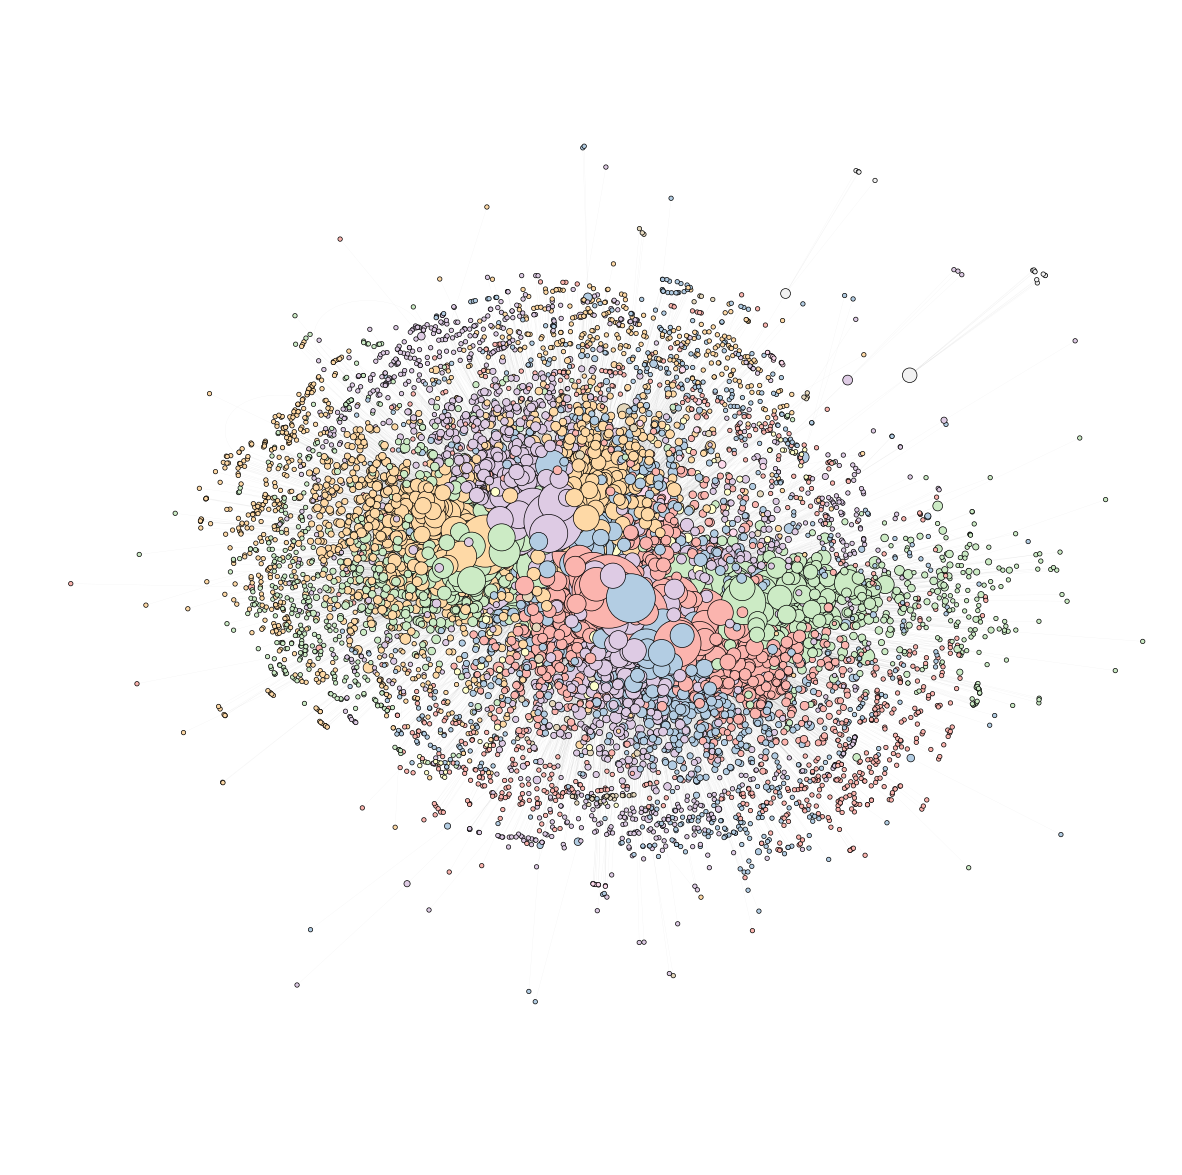

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.colors import to_hex
import matplotlib.transforms as transforms

node_colors = [user_color_map[node] for node in G_filtered.nodes]

node_sizes = [G_filtered.degree(node) * 10 for node in G_filtered.nodes]

pos = nx.spring_layout(G_filtered, seed=42)

fig, ax = plt.subplots(figsize=(15, 15))

rotate = transforms.Affine2D().rotate_deg(90)  
ax.transData = rotate + ax.transData

nx.draw_networkx_edges(
    G_filtered,
    pos=pos,
    ax=ax,
    alpha=0.05,  
    width=0.2    
)

nx.draw_networkx_nodes(
    G_filtered,
    pos=pos,
    ax=ax,
    node_size=node_sizes,
    node_color=node_colors,
    linewidths=0.5,  
    edgecolors="black"
)

plt.axis("off")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

# Create a sample plot
fig, ax = plt.subplots()
ax.plot([0, 1, 2], [0, 1, 4])

# Apply a rotation transformation
rotate = transforms.Affine2D().rotate_deg(90)  # Rotate by 90 degrees
ax.transData = rotate + ax.transData

plt.show()

In [32]:
graph_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

# Enregistrer le HTML dans un fichier
with open("../../docs/_includes/plots/user_graph2.html", "w") as f:
    f.write(graph_html)


[nan, '(aeropagitica)', '23skidoo', '@pple', 'AYArktos', 'Aaron Brenneman', 'Abela2006', 'Acetic Acid', 'Agathoclea', 'Airplaneman', 'Alex S', 'AlexandrDmitri', 'AlexiusHoratius', 'Alison', 'Ambuj.Saxena', 'AndonicO', 'Andrew c', 'Andrwsc', 'Andy5190', 'Antandrus', 'Appleboy', 'Arkyan', 'Arvindn', 'Audi152', 'Avruch', 'Babajobu', 'Backslash Forwardslash', 'Bahamut0013', 'Banaticus', 'Bastique', 'Bbb23', 'Bduke', 'Bellhalla', 'Benon3', 'Benon4', 'Benon5', 'Betacommand', 'Bhadani', 'Bibliomaniac15', 'Bigtimepeace', 'Bjelleklang', 'Bobo192', 'Bongwarrior', 'Bookofjude', 'Bottesini', 'Bradjamesbrown', 'Brian New Zealand', 'Bubba hotep', 'Bumm13', 'CIreland', 'CRGreathouse', 'Cactus.man', 'Cailil', "Can't sleep, clown will eat me", 'Canadian Paul', 'Canadian-Bacon', 'CanadianCaesar', 'CapitalR', 'Carrite', 'Cbl62', 'Celestianpower', 'Cenarium', 'Ceranthor', 'Chamal N', 'Chaser', 'Choess', 'Cholmes75', 'Chris 73', 'ChrisGriswold', 'Christopher Mahan', 'Circeus', 'Commander Keane', 'CorbinSim